In [9]:
# !pip install ultralytics

Run this cell as it is

In [1]:
import os
import glob
import yaml
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

class_name = { 0: 'Mass',
1: 'Spiculation',
2: 'Suspicious Calcification',
3: 'Architectural Distortion',
4: 'Asymmetry',
5: 'Focal Asymmetry',
6: 'Skin Thickening',
7: 'Global Asymmetry',
8: 'Suspicious Lymph Node',
9: 'Skin Retraction',
10: 'Nipple Retraction'
}

color_dict = {
    0: (255, 0, 0),      # Red
    1: (0, 255, 0),      # Green
    2: (0, 0, 255),      # Blue
    3: (255, 255, 0),    # Yellow
    4: (255, 165, 0),    # Orange
    5: (128, 0, 128),    # Purple
    6: (0, 255, 255),    # Cyan
    7: (255, 192, 203),  # Pink
    8: (128, 128, 0),    # Olive
    9: (0, 0, 0),        # Black
    10: (169, 169, 169)  # Dark Grey
}

Run this cell as it is

In [2]:
def remove_cache_files(directory):
    cache_files = glob.glob(os.path.join(directory, "*.cache"))
    for cache_file in cache_files:
        os.remove(cache_file)
        print(f"Removed: {cache_file}")
        
with open("/home/rshah133/bcd/dataset.yaml", 'r') as stream:
    data_loaded = yaml.safe_load(stream)

remove_cache_files(os.path.dirname(data_loaded['train']))
remove_cache_files(os.path.dirname(data_loaded['val']))

Removed: /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/train/labels.cache
Removed: /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/val/labels.cache


Model Setup, Change the model and hyperparameters. Keep epochs atleast 50

In [ ]:
model = YOLO('yolov8n.yaml')
results = model.train(data = "/home/rshah133/bcd/dataset.yaml", epochs = 300, imgsz = 1024, batch = 6, device = 0, patience = 20)

New https://pypi.org/project/ultralytics/8.3.63 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.58 🚀 Python-3.11.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-80GB, 81158MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/home/rshah133/bcd/dataset.yaml, epochs=3, time=None, patience=20, batch=6, imgsz=1024, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

E0000 00:00:1737304973.453680  132710 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737304973.456567  132710 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/train/labels... 112 images, 0 backgrounds, 0 corrupt: 100%|██████████| 112/112 [00:00<00:00, 1369.83it/s]

train: New cache created: /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/train/labels.cache



/home/rshah133/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
val: Scanning /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/val/labels... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<00:00, 643.24it/s]

val: New cache created: /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/val/labels.cache



/home/rshah133/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000515625), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.19G      3.949      5.864      4.179         34       1024: 100%|██████████| 19/19 [00:02<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]

                   all         21        140          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.13G      3.917      5.676       4.17         51       1024: 100%|██████████| 19/19 [00:01<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.39it/s]

                   all         21        140          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.07G      3.916      5.559      4.138         61       1024: 100%|██████████| 19/19 [00:01<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.66it/s]

                   all         21        140          0          0          0          0



3 epochs completed in 0.003 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.3MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.11.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-80GB, 81158MiB)
YOLOv8n summary (fused): 168 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all         21        140          0          0          0          0


Speed: 0.4ms preprocess, 0.9ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/train4


Run this cell as it is

In [4]:
with open("/home/rshah133/bcd/test_dataset.yaml", 'r') as stream:
    data_loaded = yaml.safe_load(stream)

remove_cache_files(os.path.dirname(data_loaded['train']))
remove_cache_files(os.path.dirname(data_loaded['val']))

Removed: /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/train/labels.cache
Removed: /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/test/labels.cache


## Change path and mention the latest train folder generated

* For eg. '/home/rshah133/bcd/runs/detect/train/weights/best.pt'
* I have train as the latest file. Next time I run the code it would change to train2. 
* So please check and change this everytime you run the code

In [5]:
best_model_path = 'runs/detect/train2/weights/best.pt'

Predicting on test data

In [11]:
best_model = YOLO(best_model_path)

test_img_path = data_loaded['val']
results = best_model.predict(source = test_img_path, save = True,  save_txt = True,  conf = 0.1)


image 1/24 /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/test/images/1560345de7d8277b170ca3842eae6c97_e751e5a947089704457741eea74c2280.jpg: 1024x832 (no detections), 32.1ms
image 2/24 /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/test/images/21ee099d74242fca1551adb6f2564a15_b73d4e04b69d52ba6f350cc77da54f95.jpg: 1024x832 268 Spiculations, 5.8ms
image 3/24 /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/test/images/2dfe6025d5954c2925d6288b50dccbea_a20301f2d2cafec6419d759fa7c70c0b.jpg: 1024x736 (no detections), 29.9ms
image 4/24 /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/test/images/3b9d3e9aa2fcdefd74d4cbfb496694b4_6c571a3fb5a3abe21141333f65b5bf09.jpg: 1024x832 300 Spiculations, 6.7ms
image 5/24 /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/test/images/43a5db0fd868e525cf75aaf5d53a1863_493609b26e1341ce737a60b5b930a757.jpg: 1024x832 2 Spiculations, 6.7ms
image 6/24 /home

Run this cell as it is and take screenshot of the output. This code is for calculating the metrics for test data

In [23]:
metrics = best_model.val(data = '/home/rshah133/bcd/test_dataset.yaml', conf = 0.15)

Ultralytics 8.3.58 🚀 Python-3.11.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-80GB, 81158MiB)


val: Scanning /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/test/labels... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 1612.11it/s]

val: New cache created: /home/rshah133/breast_cancer_detection/train_val_birads5_test_birads5/test/labels.cache



/home/rshah133/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]


                   all         24        148    0.00031    0.00517   0.000163    3.6e-05
                  Mass         15         17          0          0          0          0
           Spiculation         24         86    0.00279     0.0465    0.00147   0.000324
Suspicious Calcification         20         31          0          0          0          0
Architectural Distortion          1          1          0          0          0          0
       Skin Thickening          1          1          0          0          0          0
      Global Asymmetry          1          1          0          0          0          0
 Suspicious Lymph Node          7          8          0          0          0          0
       Skin Retraction          1          1          0          0          0          0
     Nipple Retraction          2          2          0          0          0          0
Speed: 0.2ms preprocess, 8.6ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/de

## Change the directory of the variable below

* predictions_dir = Directory for the predicted labels. Eg:- "runs/detect/predict/labels" 
* Here predict is variable and can change to predict2, predict3 etc everytime you run it. So change it everytime

In [24]:
predictions_dir = "runs/detect/predict/labels"   

Run this cell as it is

In [25]:
test_images_dir = data_loaded['val']
test_labels_dir = os.path.join(os.path.dirname(data_loaded['val']), 'labels')


output_labels_dir = "results/labels"  # Directory to save ground truth images
output_pred_dir = "results/predictions"  # Directory to save predicted images

# Create output directory if it doesn't exist
os.makedirs(output_labels_dir, exist_ok=True)
os.makedirs(output_pred_dir, exist_ok=True)

# Function to read YOLO format labels
def read_yolo_labels(label_file):
    labels = []
    with open(label_file, "r") as f:
        for line in f:
            parts = line.strip().split()
            class_id, x_center, y_center, width, height = map(float, parts[:5])
            confidence = float(parts[5]) if len(parts) > 5 else None
            labels.append((int(class_id), x_center, y_center, width, height, confidence))
    return labels

# Function to draw bounding boxes on images
def draw_boxes(image, boxes):
    h, w, _ = image.shape
    for box in boxes:
        class_id, x_center, y_center, width, height, confidence = box
        x_min = int((x_center - width / 2) * w)
        y_min = int((y_center - height / 2) * h)
        x_max = int((x_center + width / 2) * w)
        y_max = int((y_center + height / 2) * h)
        # Draw rectangle
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color_dict[class_id], 2)
    return image

# Loop through each image
for image_file in os.listdir(test_images_dir):
    if image_file.endswith((".jpg", ".png", ".jpeg")):
        base_name = os.path.splitext(image_file)[0]
        image_path = os.path.join(test_images_dir, image_file)

        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error loading {image_file}")
            continue

        # Read ground truth labels
        ground_truth_file = os.path.join(test_labels_dir, f"{base_name}.txt")
        ground_truth_boxes = read_yolo_labels(ground_truth_file) if os.path.exists(ground_truth_file) else []

        # Read prediction labels
        prediction_file = os.path.join(predictions_dir, f"{base_name}.txt")
        prediction_boxes = read_yolo_labels(prediction_file) if os.path.exists(prediction_file) else []

        # Draw ground truth (green) and predictions (blue)
        image_with_boxes_gt = draw_boxes(image.copy(), ground_truth_boxes)
        image_with_boxes_pt = draw_boxes(image.copy(), prediction_boxes)

        # Save annotated image
        gt_output_path = os.path.join(output_labels_dir, image_file)
        cv2.imwrite(gt_output_path, image_with_boxes_gt)

        pt_output_path = os.path.join(output_pred_dir, image_file)
        cv2.imwrite(pt_output_path, image_with_boxes_pt)

print("Done saving the predictions")

Done saving the predictions


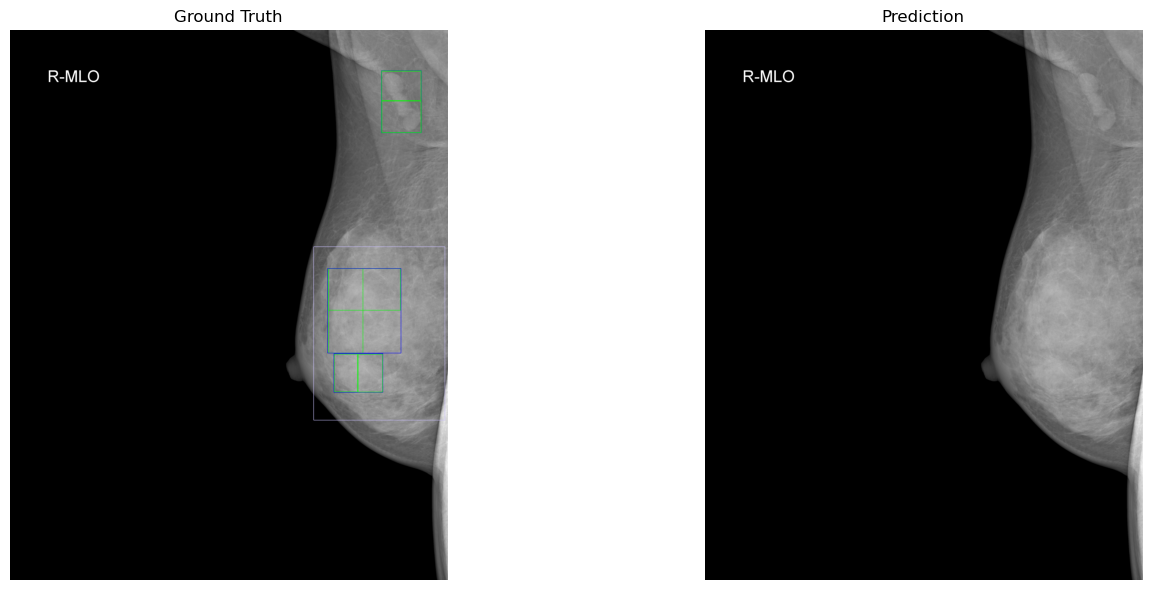

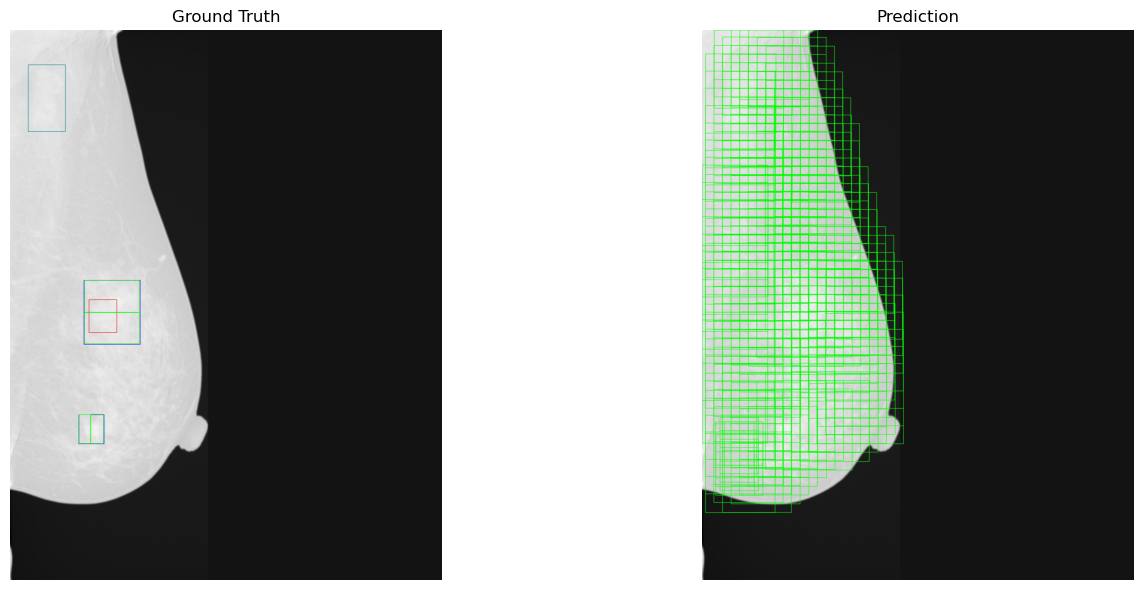

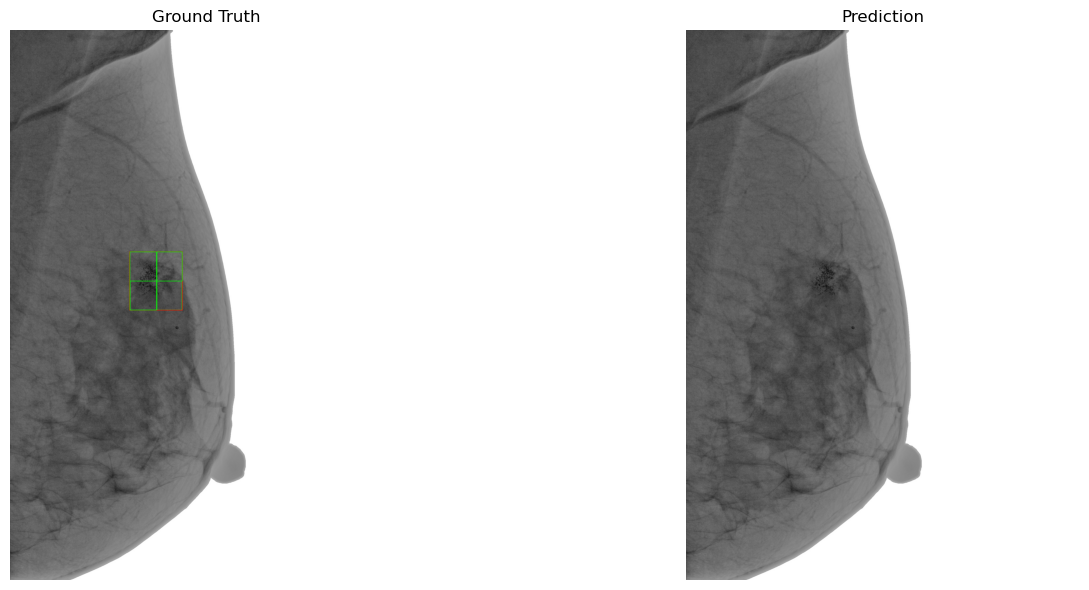

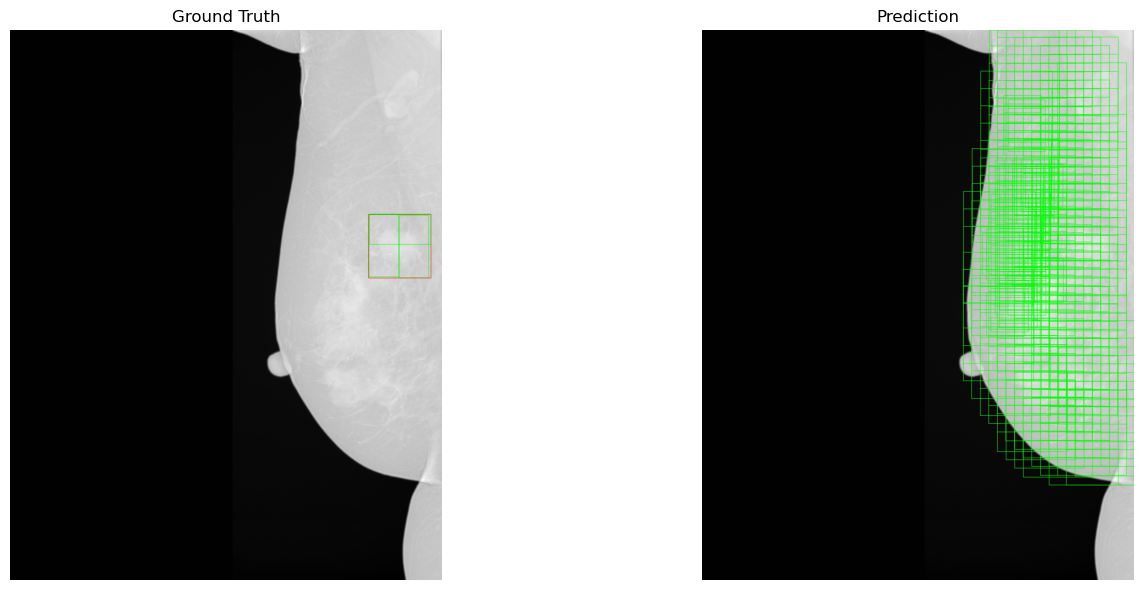

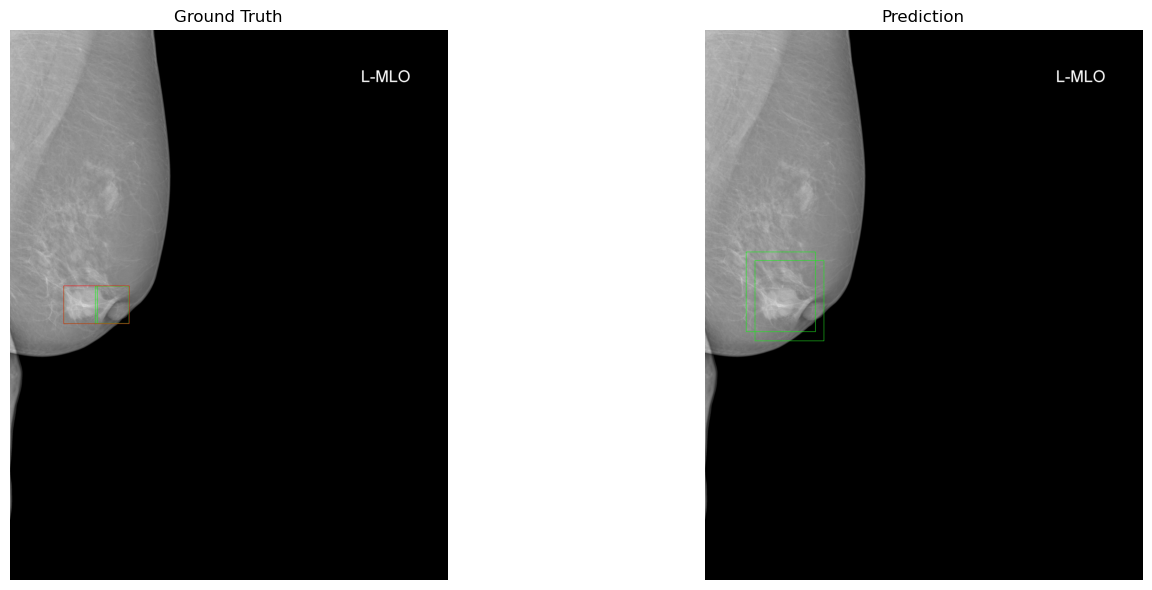

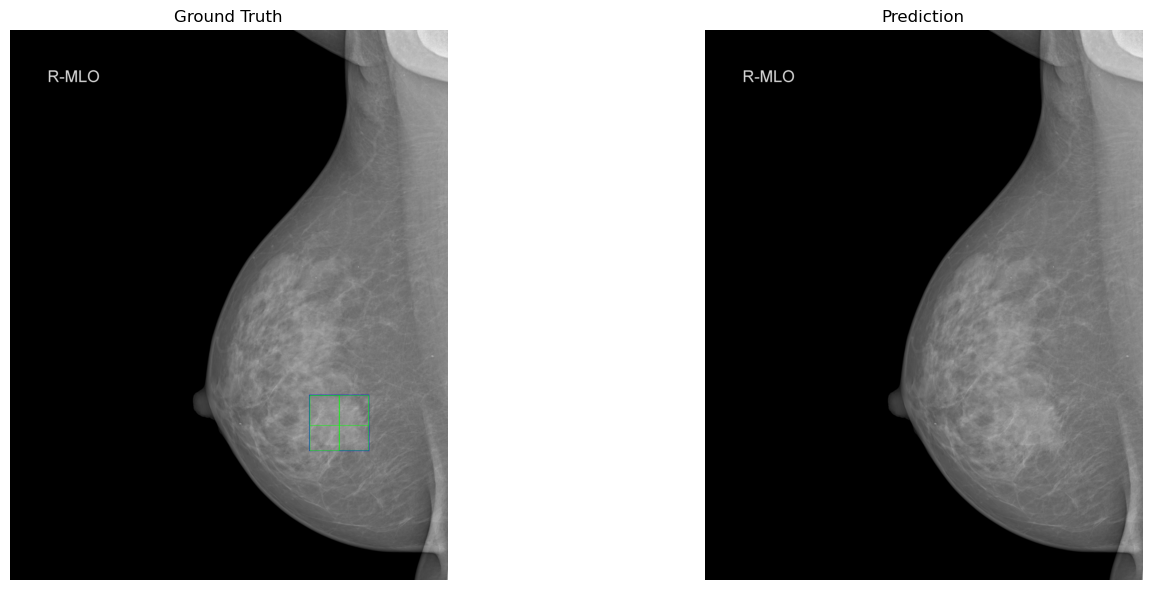

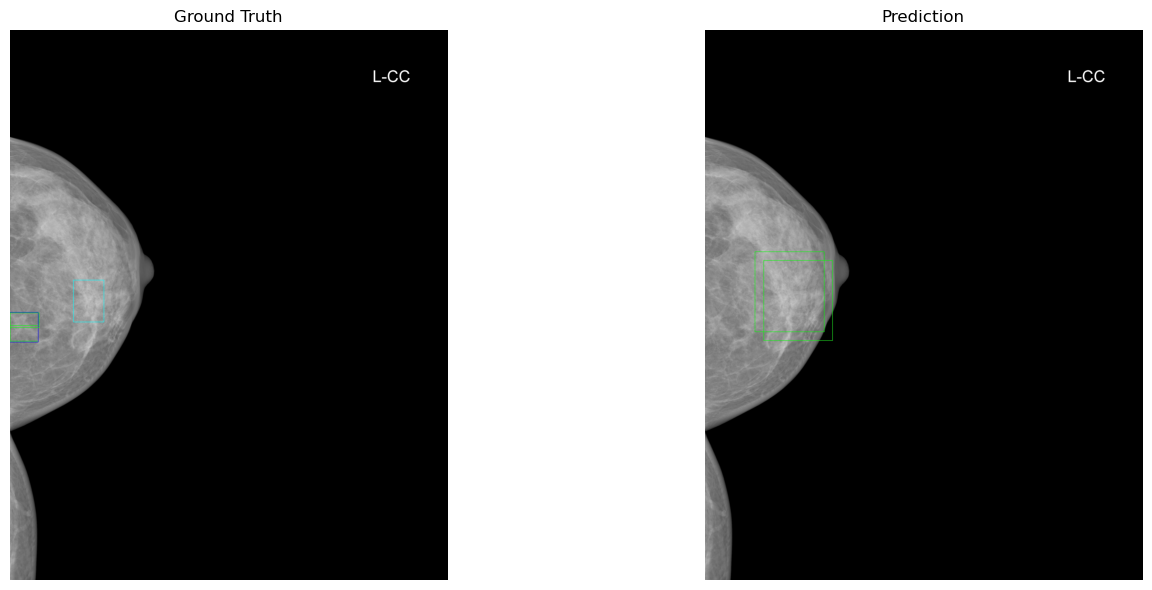

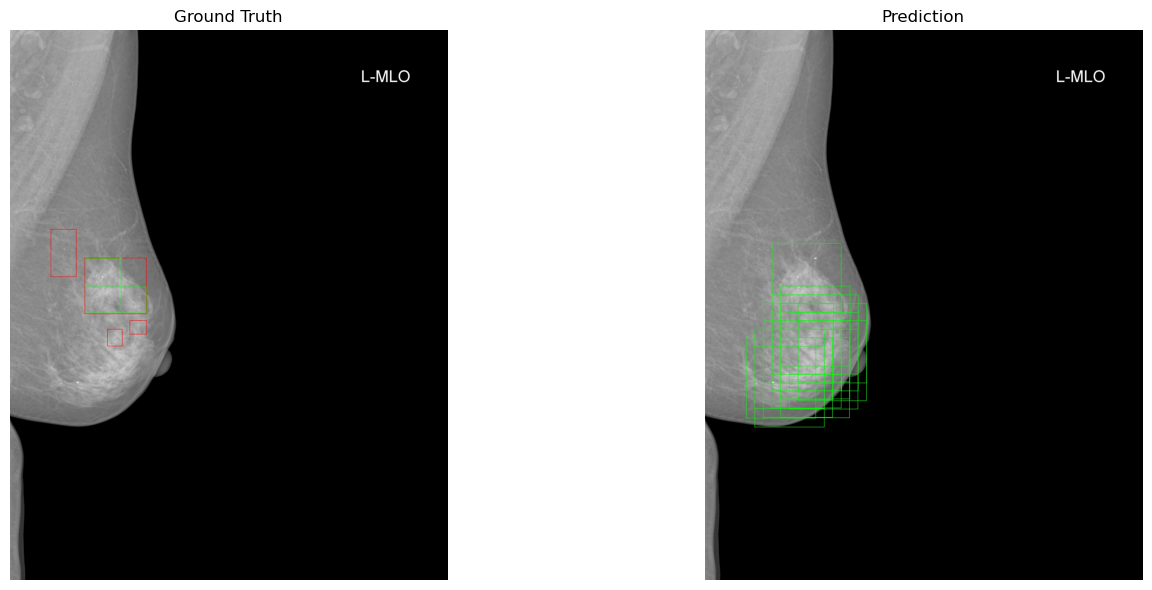

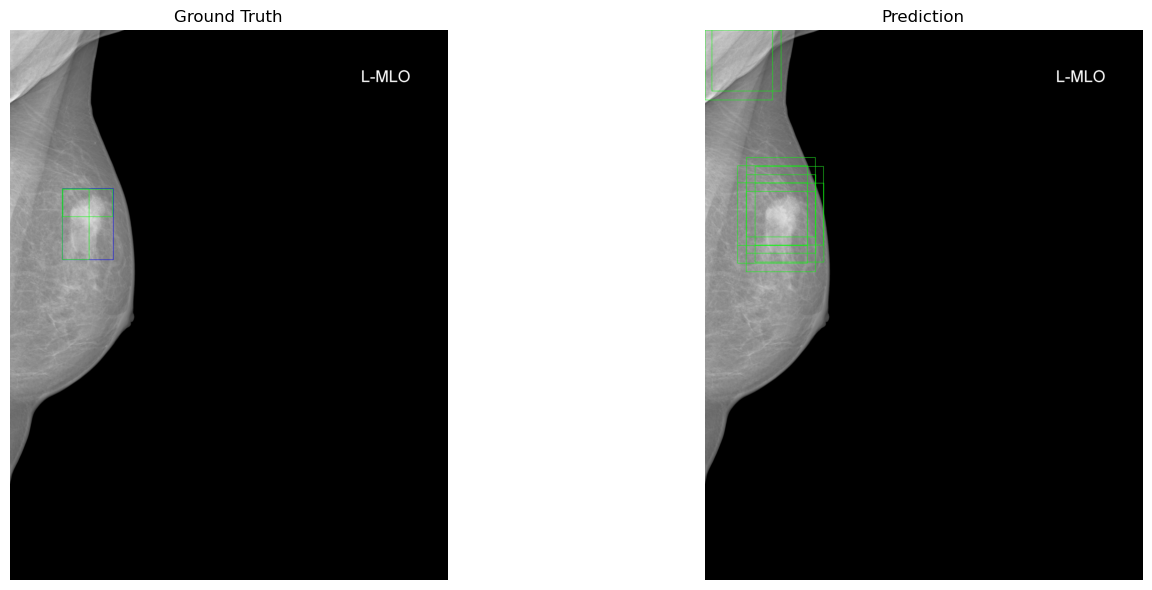

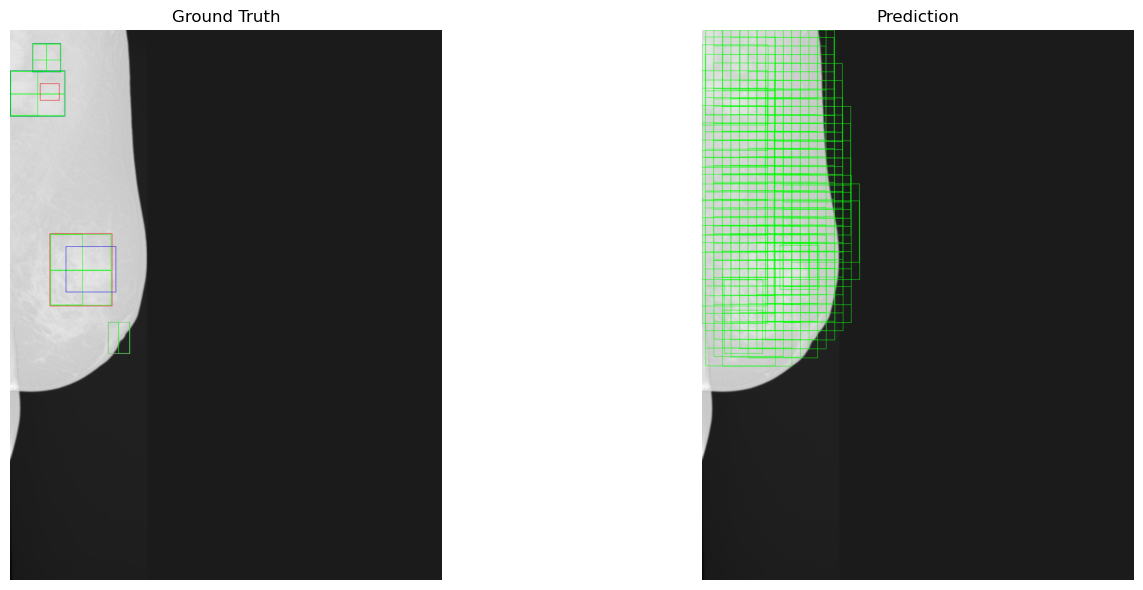

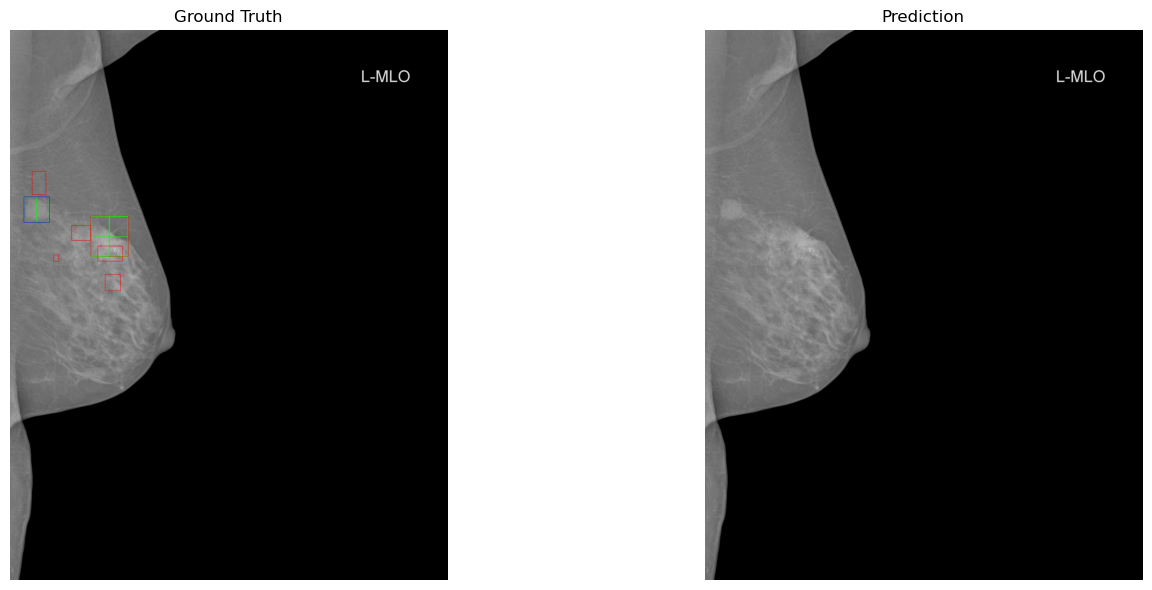

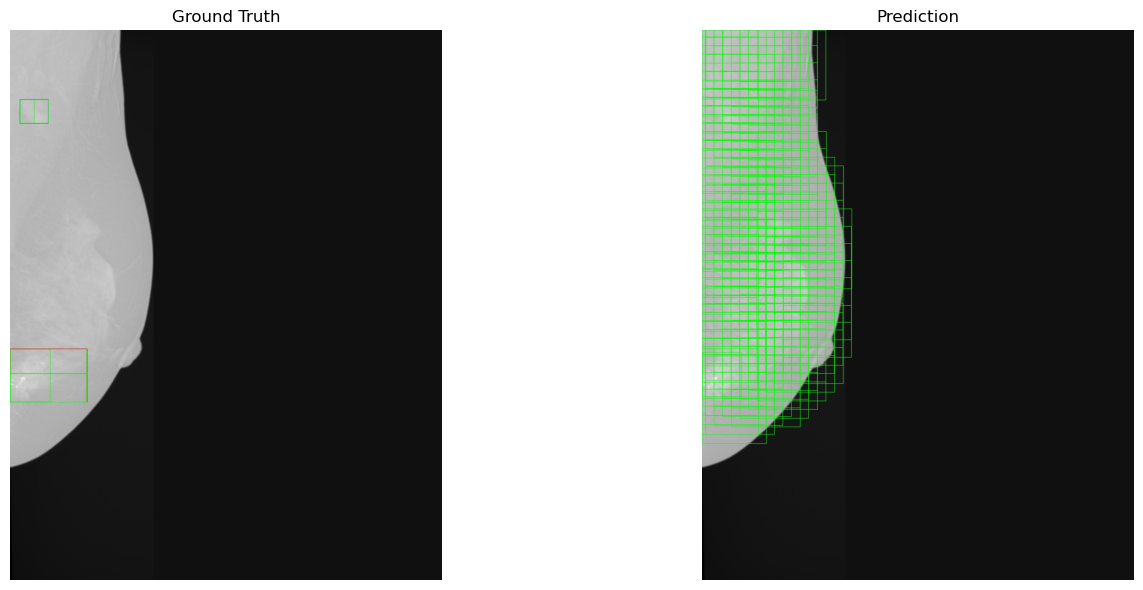

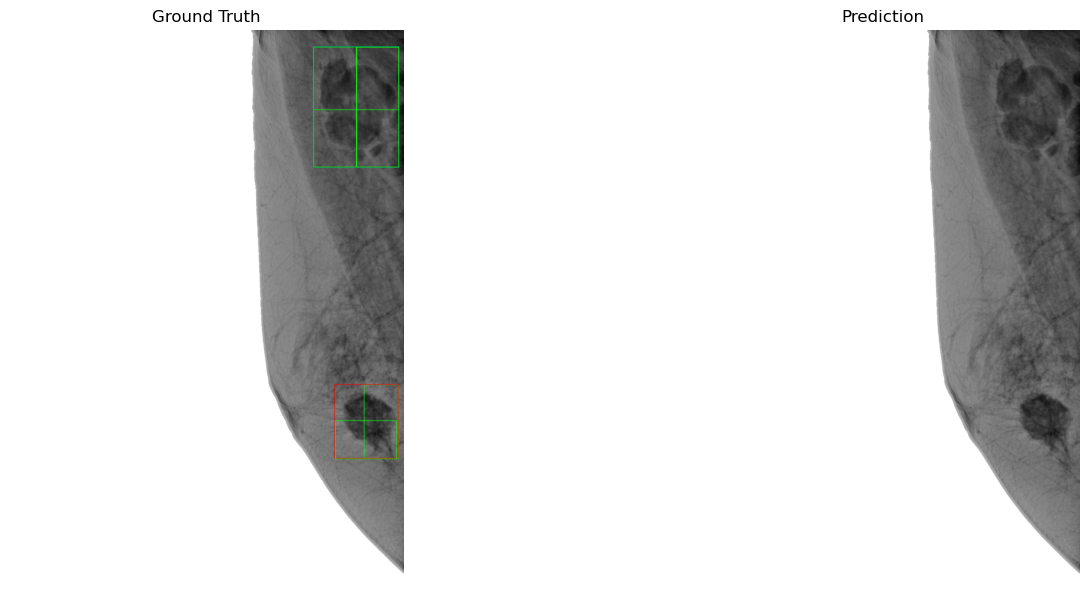

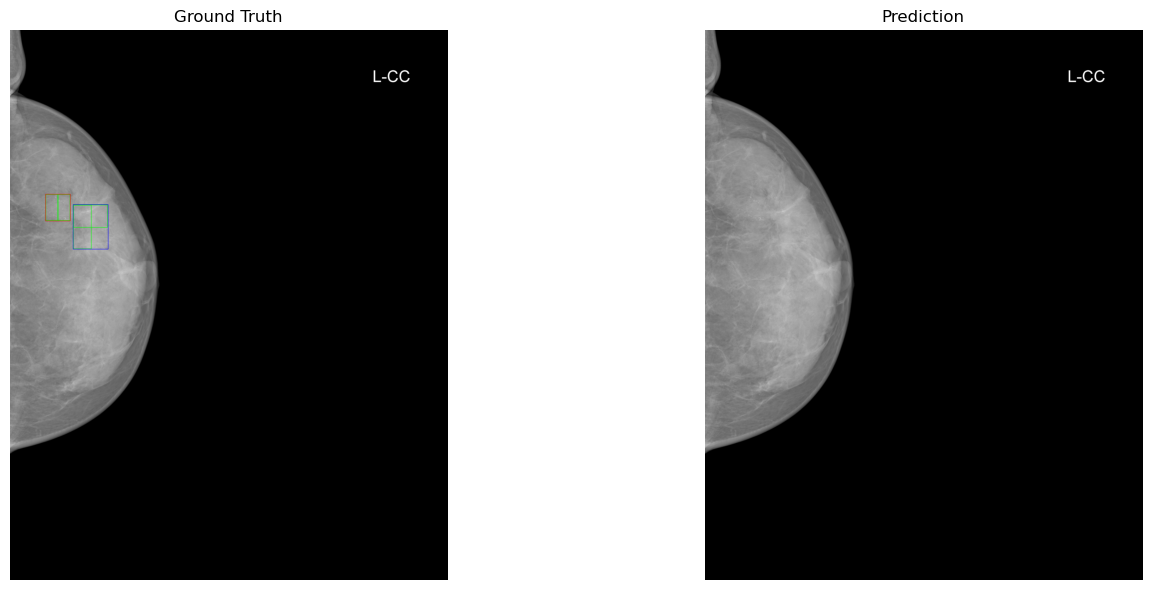

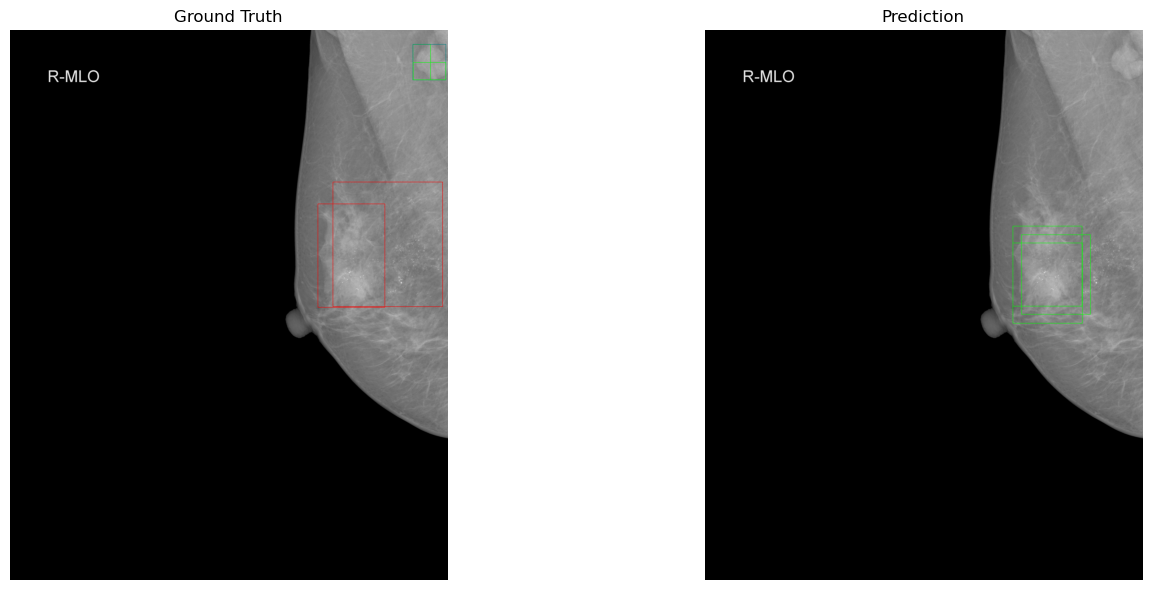

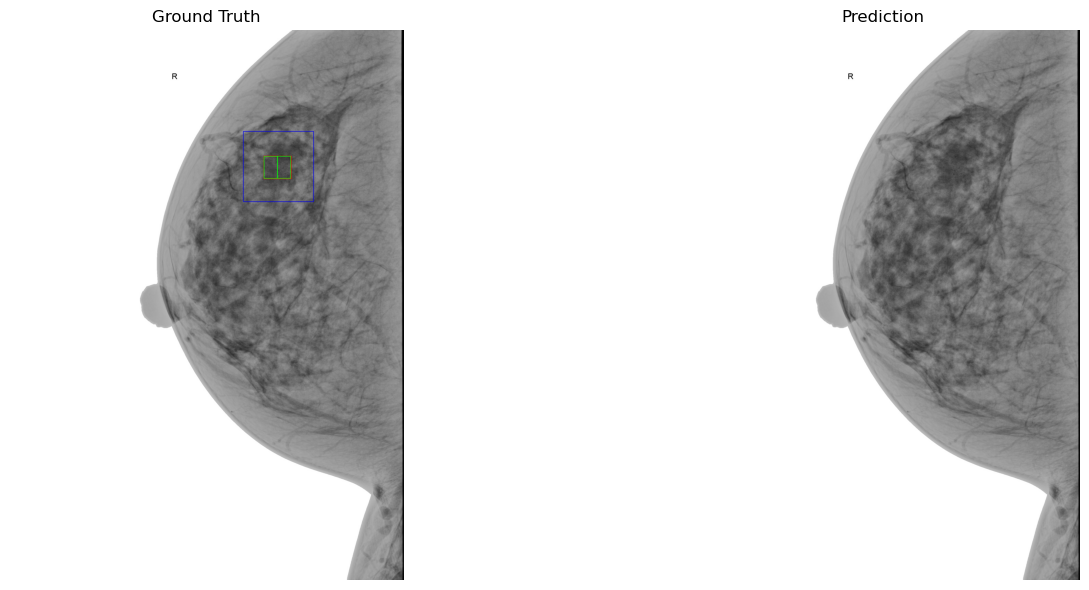

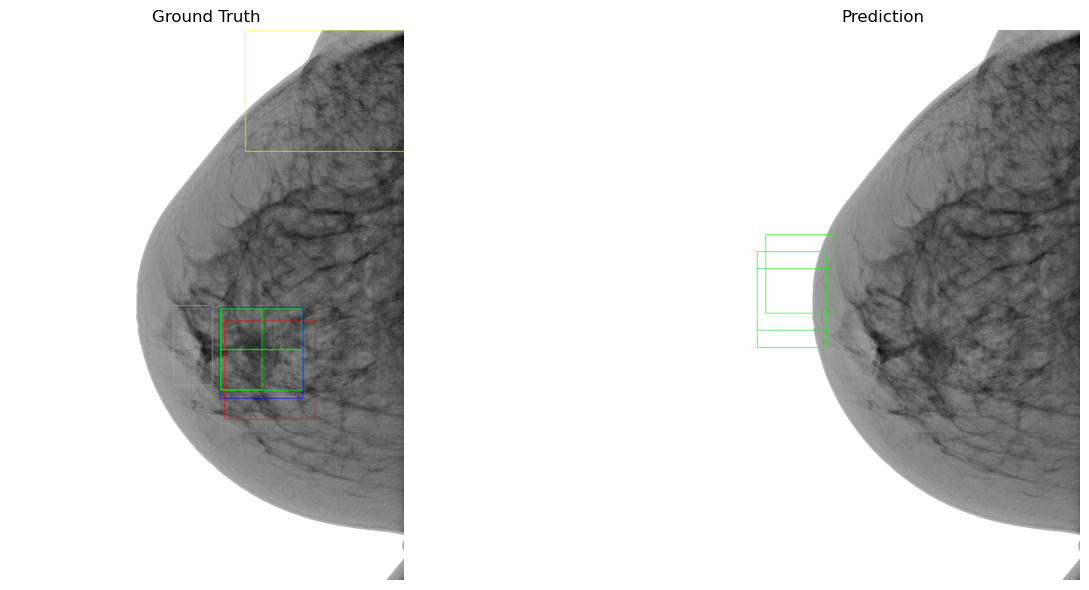

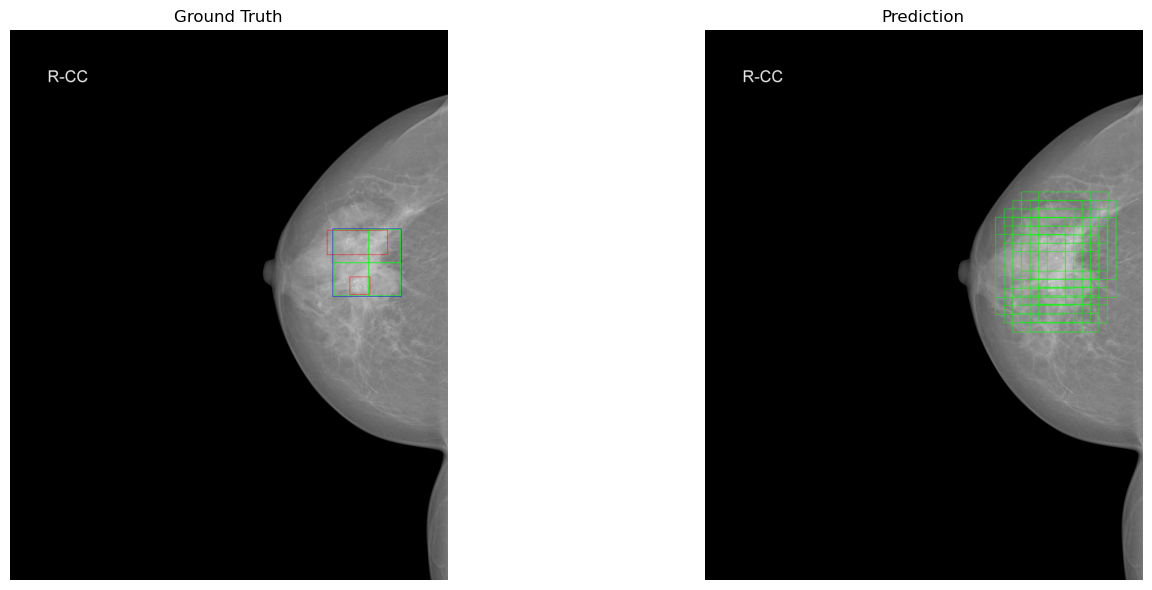

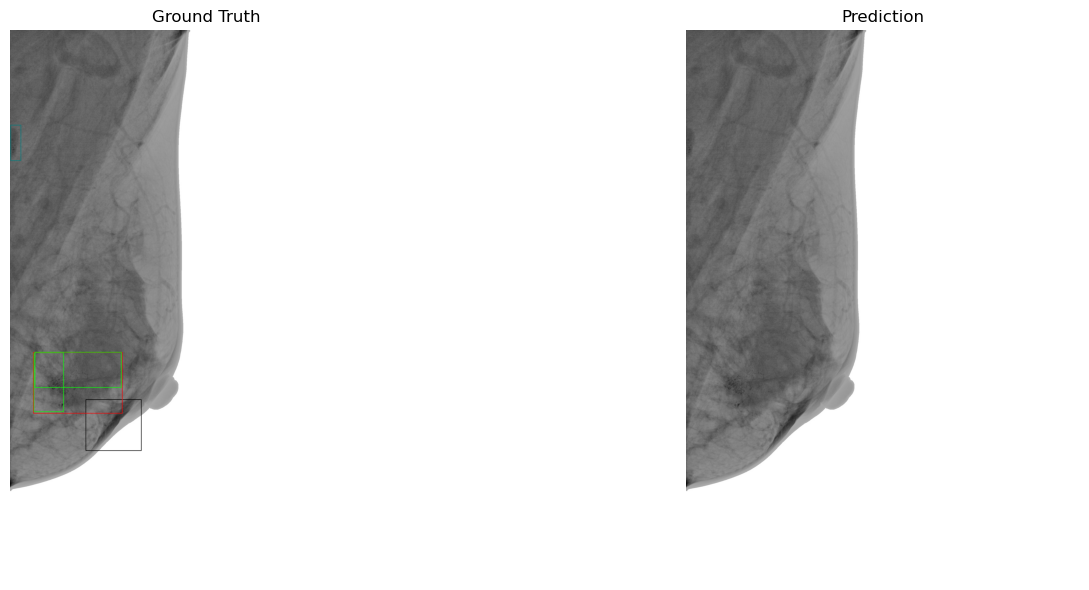

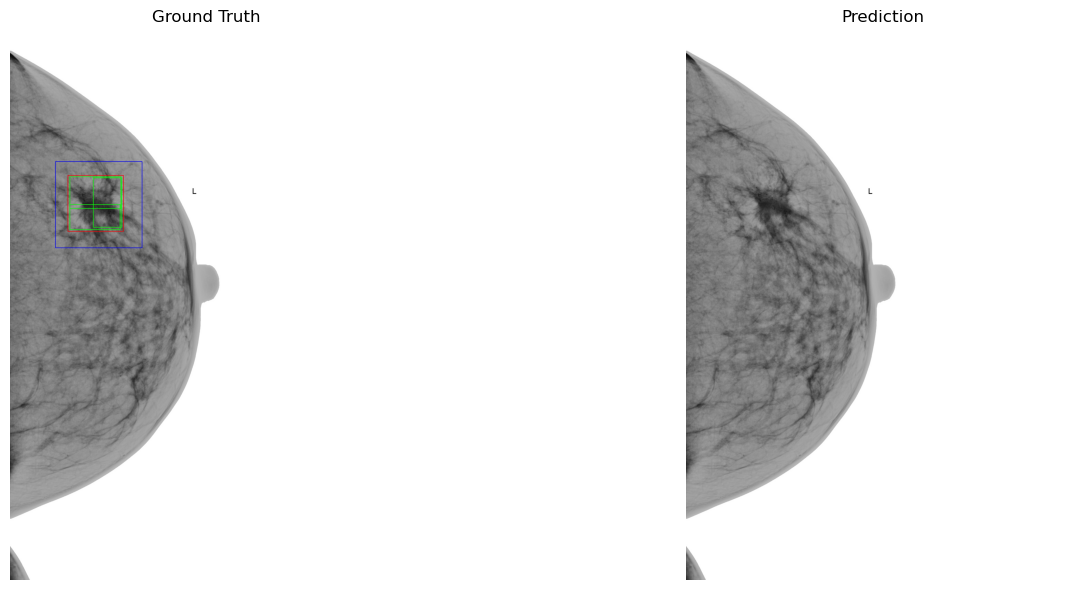

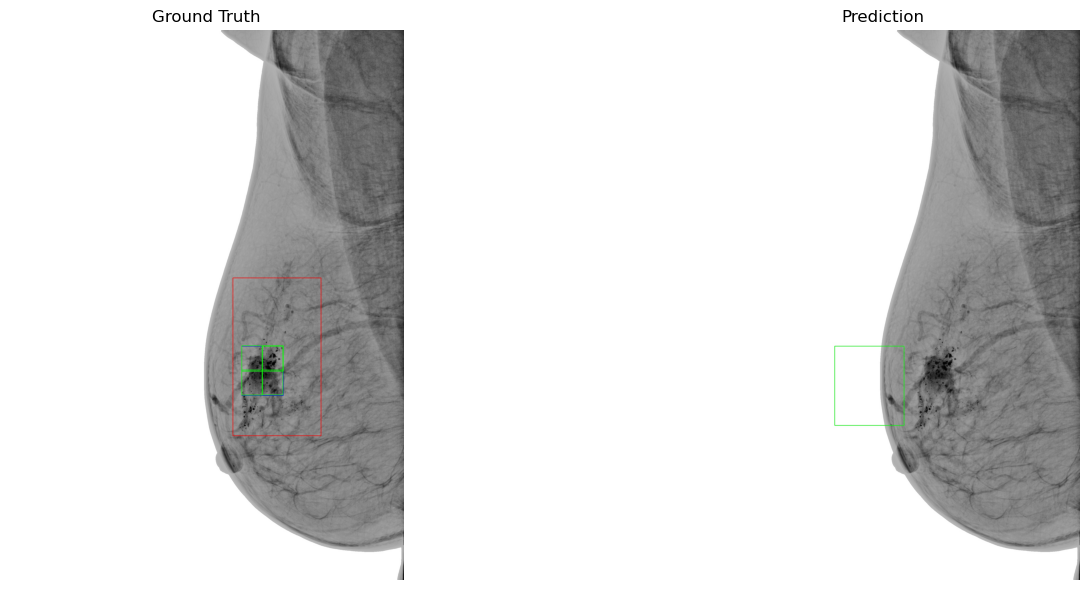

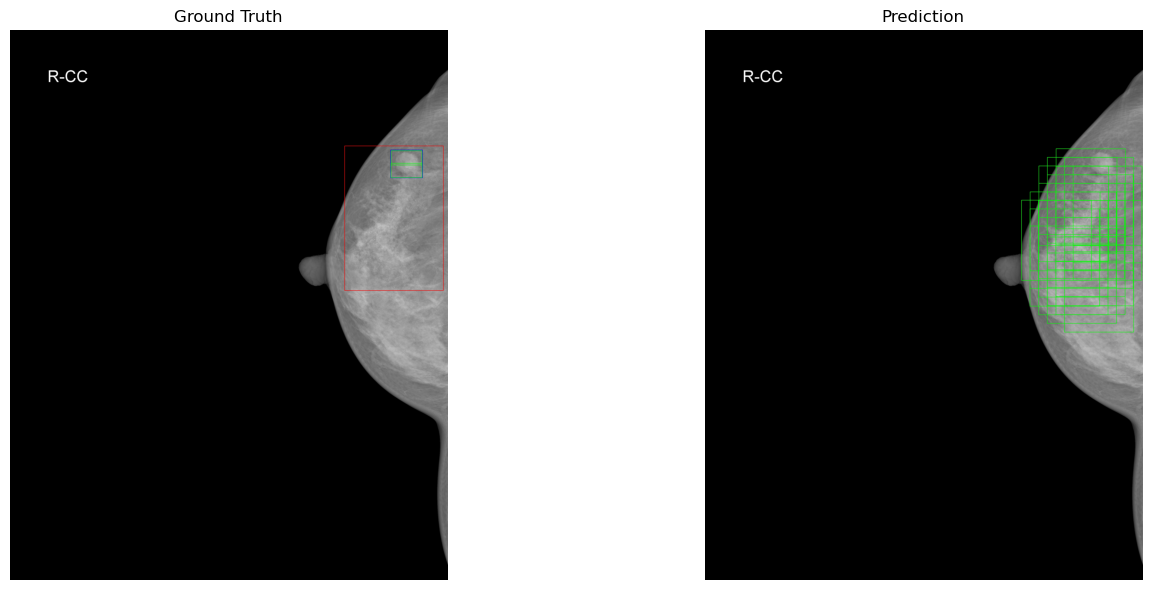

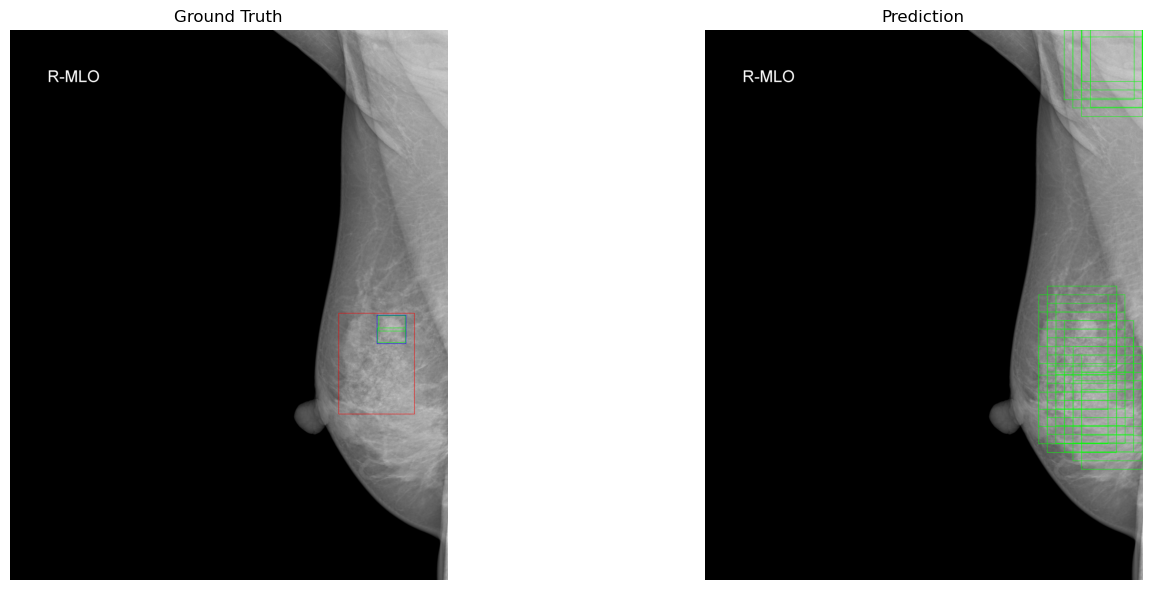

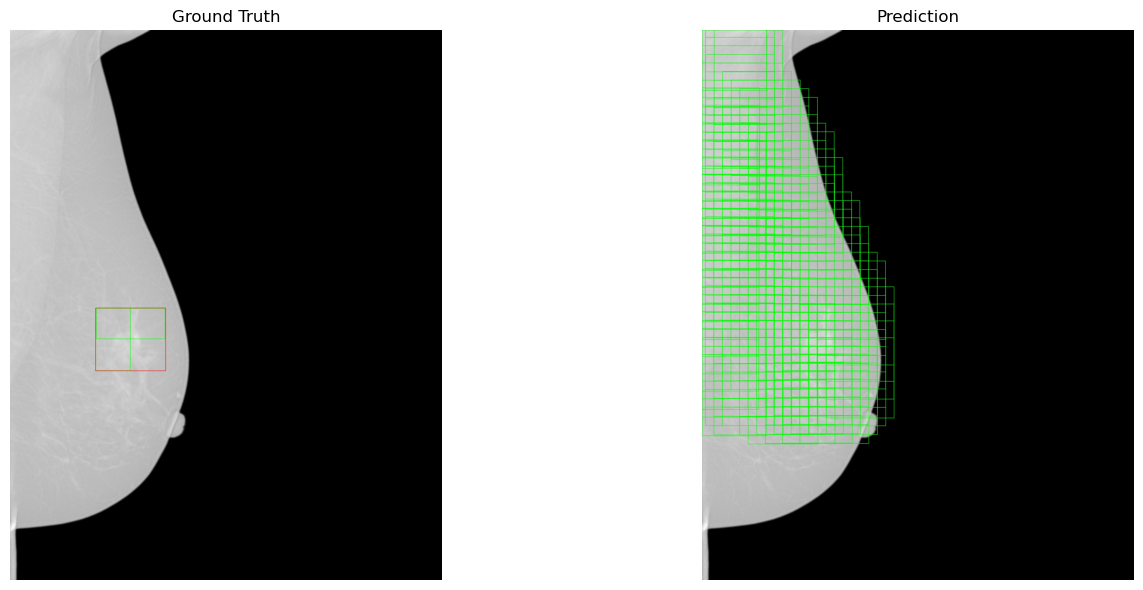

In [26]:
%matplotlib inline

output_labels_file_names = sorted(os.listdir(output_labels_dir))
output_pred_file_names = sorted(os.listdir(output_pred_dir))

for label_file, pred_file in zip(output_labels_file_names, output_pred_file_names):
    label_img = cv2.imread(os.path.join(output_labels_dir, label_file))
    pred_img = cv2.imread(os.path.join(output_pred_dir, pred_file))
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    axs[0].imshow(cv2.cvtColor(label_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Ground Truth')
    axs[0].axis('off')
    axs[1].imshow(cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Prediction')
    axs[1].axis('off')
    plt.tight_layout()
    plt.show()